# Подготовка данных для анализа

In [160]:
import plotly.express as px
import pandas as pd

data = pd.read_csv('People_killed_by_guns_in_USA.csv')
data_cleaned = data.dropna(subset=['Victim Age', 'Victim Gender', 'Victim Age Group'])
data_cleaned['Date Killed'] = pd.to_datetime(data_cleaned['Date Killed'], errors='coerce')
columns_to_drop = [
    'Long Gun - State Permit to Purchase', 'Long Gun - Firearm registration', 
    'Long Gun - Assault weapon law', 'Long Gun - Owner license required', 
    'Long Gun - Carry permits issued', 'Long Gun - Open Carry', 
    'Long Gun - State Preemption of local restrictions', 'Long Gun - NFA weapons restricted', 
    'Long Gun - Peaceable Journey laws', 'Handgun - State Permit to Purchase', 
    'Handgun - Firearm registration', 'Handgun - Assault weapon law', 
    'Handgun - Owner license required', 'Handgun - Carry permits issued', 
    'Handgun - Open Carry', 'Handgun - State Preemption of local restrictions', 
    'Handgun - NFA weapons restricted', 'Handgun - Peaceable Journey laws'
]
data_cleaned = data_cleaned.drop(columns=columns_to_drop)

C:\Users\faris\AppData\Local\Temp\ipykernel_6988\2629536684.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Возрастные группы жертв

In [161]:
fig_age_group = px.histogram(data_cleaned, x='Victim Age Group', title='Распределение жертв по возрастным группам')
fig_age_group.show()

# Гипотеза: Зависимость количества убийств от пола жертвы

In [162]:
fig_gender = px.histogram(data_cleaned, x='Victim Gender', title='Распределение жертв по полу')
fig_gender.show()

fig_gender_age = px.histogram(data_cleaned, x='Victim Age', color='Victim Gender', barmode='overlay', title='Распределение убийств по возрасту и полу')
fig_gender_age.show()

# Временной анализ

In [163]:
fig_month = px.histogram(data_cleaned, x='Date Killed.month', title='Количество жертв по месяцам')
fig_month.show()

fig_weekday = px.histogram(data_cleaned, x='Date Killed.day-of-week', title='Количество жертв по дням недели')
fig_weekday.show()

# Распределение по штатам

In [164]:
# Распределение по штатам
fig_state = px.histogram(data_cleaned, x='State', title='Распределение жертв по штатам')
fig_state.show()

# Объединение данных для анализа в контексте времени и географии
fig_geo_time = px.scatter_geo(data_cleaned, lat='Latitude', lon='Longitude', color='Date Killed.year',
                              hover_name='City', title='Географическое и временное распределение инцидентов', scope='usa')
fig_geo_time.show()
# Географическое распределение инцидентов
fig_geo = px.scatter_geo(data_cleaned, lat='Latitude', lon='Longitude', hover_name='City',
                         title='Географическое распределение инцидентов', scope='usa')
fig_geo.show()


# Количество убийств по штатам

In [165]:
# Загрузка и очистка данных
data_cleaned = data_cleaned.dropna(subset=['Victim Age', 'Victim Gender', 'Victim Age Group'])
data_cleaned['Date Killed'] = pd.to_datetime(data_cleaned['Date Killed'], errors='coerce')

# Группировка данных по штатам и подсчет количества убийств в каждом штате
state_counts = data_cleaned['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
state_counts['StateCode'] = state_counts['State'].map(us_state_abbrev)
# Визуализация штатов по количеству убийств
fig_state_map = px.choropleth(state_counts, 
                              locations='StateCode', 
                              locationmode='USA-states', 
                              color='Count', 
                              scope='usa',
                              hover_name='State', 
                              color_continuous_scale='Reds',
                              title='Количество убийств по штатам')
fig_state_map.show()


C:\Users\faris\AppData\Local\Temp\ipykernel_6988\1771576749.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



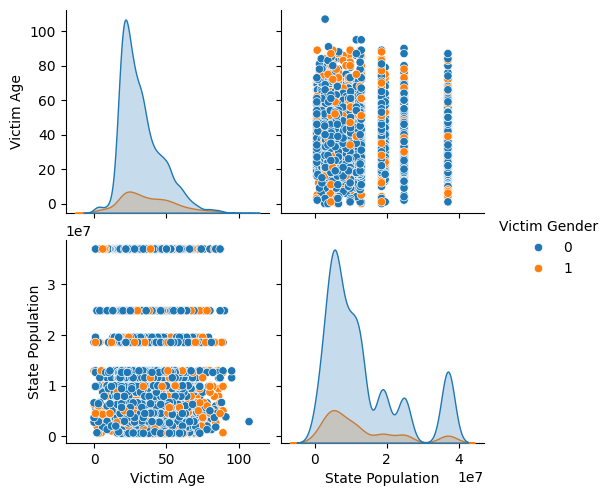

In [166]:
import seaborn as sns
features = data_cleaned[["Victim Age", "State Population", "Victim Gender"]]
features["Victim Gender"] = features["Victim Gender"].map({"Male": 0, "Female":1})
sns.pairplot(features, hue="Victim Gender")